In [1]:
import pandas as pd
data = pd.read_csv('/content/drive/MyDrive/shashank_paper_1/data_final.csv')


In [2]:
data.head()

,Unnamed: 0,text,label
0,0,my biggest problem is overthinking everything,1
1,1,the worst sadness is the sadness you've taught...,1
2,2,i already know i’m not good enough.,1
3,3,"i'm not the same anymore. i'll admit it, a lot...",1
4,4,"i have so much on my mind, but i end up saying...",1


In [3]:
data = data.drop('Unnamed: 0',1)

In [4]:
data_text = data['text']
data_label = data['label']

In [5]:
print(data.shape)

(12029, 2)


In [6]:
 import numpy as np
 from sklearn.model_selection import train_test_split
 train, test, labels_train, labels_test = train_test_split(data_text, data_label, test_size=0.25, random_state=42 )

In [7]:
train.head()

3528     You look happy but you dont feel happy Thats w...
4040     May your choices reflect your hopes, not your ...
11794    trump is the 'embodiment of everything republi...
447                          No one is I'm better off dead
4580     Where I'm from, they'll beat your head until i...
Name: text, dtype: object

In [8]:
print(train.shape, test.shape, labels_train.shape, labels_test.shape)

(9021,) (3008,) (9021,) (3008,)


In [9]:
import numpy as np
from keras.utils.np_utils import to_categorical
#classes_list = ["ham","spam"]
#label_index = class_label.apply(classes_list.index)
label_train = to_categorical(np.asarray(labels_train))
label_test = to_categorical(np.asarray(labels_test))

In [10]:
print(label_train.shape, label_test.shape)

(9021, 2) (3008, 2)


In [11]:
label_test

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [0., 1.],
       [0., 1.],
       [1., 0.]], dtype=float32)

In [12]:
from keras.preprocessing.text import Tokenizer
tk=Tokenizer(filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n',lower=True, split=" ")
tk.fit_on_texts(train)
index=tk.word_index
#print(index)
x = tk.texts_to_sequences(train)
x1 = tk.texts_to_sequences(test)
#print (x)
vocab_size = len(index)
word_index = tk.word_index

In [13]:
from keras.preprocessing.sequence import pad_sequences
embedding_vecor_length =32
padded_docs_train = pad_sequences(x, maxlen=embedding_vecor_length, padding='post')
padded_docs_test = pad_sequences(x1, maxlen=embedding_vecor_length, padding='post')


In [14]:
#load pre-trained embedding:
embeddings_index = {}
f = open('/content/drive/My Drive/LSTM_Attention_on_sarcasm_dataset/glove.twitter.27B/glove.twitter.27B.200d.txt', encoding="utf8")
for line in f:
    values = line.split()#This splits each values in a  line with spaces
    word = values[0] # This store the first values which is the word in english
    coefs = np.asarray(values[1:], dtype='float32') # This converts all splitted values from 1 to last(expect first word) into an array
    embeddings_index[word] = coefs # english word = array of numerical values
f.close()
print('Total %s word vectors in Glove 6B 200d.' % len(embeddings_index))

Total 1193514 word vectors in Glove 6B 200d.


In [15]:
# Initialize the weight for each word for the embedding layer. Words not present
# in the dictionary initialized by random value 
EMBEDDING_DIM = 200
embedding_matrix = np.random.random((len(word_index) + 1, EMBEDDING_DIM))
#embedding_matrix = (16433, 100) NOTE: It is from uniques words in our tweets
for word, i in word_index.items(): # Selecting word from our tweet unique words list for changing with the values from glove
    embedding_vector = embeddings_index.get(word) # Finding our tweet words in glove and taking its array of 100 values
    if embedding_vector is not None: 
#words not found in embedding index will be all-zeros.
        embedding_matrix[i] = embedding_vector

In [16]:
classes_list = ["Non-depressive","Depressive"]

In [17]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import itertools
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j],fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


In [18]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp

def plot_AUC_ROC(y_true, y_pred):
    n_classes = 2

    # Compute ROC curve and ROC area for each class
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_true[:, i], y_pred[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Compute micro-average ROC curve and ROC area
    fpr["micro"], tpr["micro"], _ = roc_curve(label_test.ravel(), predictions_testcnn1.ravel())
    roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])
############################################################################################
    lw = 2
    # Compute macro-average ROC curve and ROC area

    # First aggregate all false positive rates
    all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

    # Then interpolate all ROC curves at this points
    mean_tpr = np.zeros_like(all_fpr)
    for i in range(n_classes):
        mean_tpr += interp(all_fpr, fpr[i], tpr[i])

    # Finally average it and compute AUC
    mean_tpr /= n_classes

    fpr["macro"] = all_fpr
    tpr["macro"] = mean_tpr
    roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

    # Plot all ROC curves
    plt.figure()
    plt.plot(fpr["micro"], tpr["micro"],
            label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
            color='deeppink', linestyle=':', linewidth=4)

    plt.plot(fpr["macro"], tpr["macro"],
            label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
            color='navy', linestyle=':', linewidth=4)

    colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
    for i, color in zip(range(n_classes), colors):
        plt.plot(fpr[i], tpr[i], color=color, lw=lw,
                label='ROC curve of class {0} (area = {1:0.2f})'
                ''.format(i, roc_auc[i]))

    plt.plot([0, 1], [0, 1], 'k--', lw=lw)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic curve')
    plt.legend(loc="lower right")
    #plt.show()

    # Plot of a ROC curve for a specific class
    '''
    plt.figure()
    lw = 2
    plt.plot(fpr[0], tpr[0], color='darkorange',
            lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[0])
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()
    '''

In [19]:
import pandas as pd
import numpy as np
from functools import reduce
def report_average(*args):
    report_list = list()
    for report in args:
        splited = [' '.join(x.split()) for x in report.split('\n')]
        splited = [x for x in splited if x != '']  
        splited[1:3] = [' '.join(splited[1:3])]
        del splited[2:4]
        del splited[-1]
        #print(splited)
        header = [x for x in splited[0].split(' ')]
        #print(header)
        data = np.array(splited[1].split(' ')).reshape(-1, len(header) + 1)
        #print(data)
        data = np.delete(data, 0, 1).astype(float)
        #print(data)
        avg_total = np.array([x for x in splited[2].split(' ')][2:]).astype(float).reshape(-1, len(header))
        df = pd.DataFrame(np.concatenate((data, avg_total)), columns=header)
        report_list.append(df)
    res = reduce(lambda x, y: x.add(y, fill_value=0), report_list) / len(report_list)
    return res.rename(index={res.index[-1]: 'weighted avg'})


In [20]:
from keras import backend as K
def f1_score(y_true, y_pred):

    # Count positive samples.
    c1 = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    c2 = K.sum(K.round(K.clip(y_pred, 0, 1)))
    c3 = K.sum(K.round(K.clip(y_true, 0, 1)))

    # If there are no true samples, fix the F1 score at 0.
    if c3 == 0:
        return 0

    # How many selected items are relevant?
    precision = c1 / c2

    # How many relevant items are selected?
    recall = c1 / c3

    # Calculate f1_score
    f1_score = 2 * (precision * recall) / (precision + recall)
    return f1_score


def precision(y_true, y_pred):

    # Count positive samples.
    c1 = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    c2 = K.sum(K.round(K.clip(y_pred, 0, 1)))
    c3 = K.sum(K.round(K.clip(y_true, 0, 1)))

    # If there are no true samples, fix the F1 score at 0.
    if c3 == 0:
        return 0

    # How many selected items are relevant?
    precision = c1 / c2

    return precision


def recall(y_true, y_pred):

    # Count positive samples.
    c1 = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    c3 = K.sum(K.round(K.clip(y_true, 0, 1)))

    # If there are no true samples, fix the F1 score at 0.
    if c3 == 0:
        return 0

    recall = c1 / c3

    return recall


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 32, 200)           2355000   
                                                                 
 conv1d (Conv1D)             (None, 30, 128)           76928     
                                                                 
 max_pooling1d (MaxPooling1D  (None, 6, 128)           0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 768)               0         
                                                                 
 dense (Dense)               (None, 256)               196864    
                                                                 
 dense_1 (Dense)             (None, 2)                 514       
                                                        

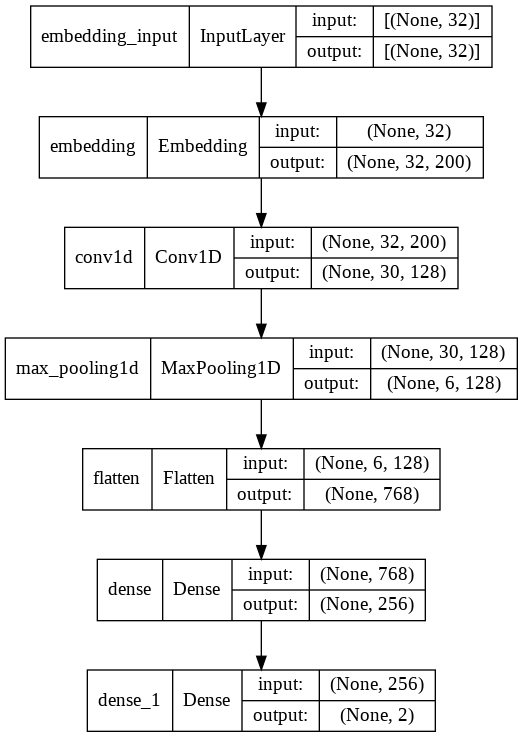

In [21]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Embedding
from keras.layers import Conv1D, GlobalMaxPooling1D, MaxPooling1D
from keras.utils.vis_utils import plot_model
model = Sequential()
model.add(Embedding(input_dim = vocab_size + 1, output_dim = 200, weights=[embedding_matrix], input_length=embedding_vecor_length, trainable=False))
model.add(Conv1D(filters = 128,kernel_size=3, activation='relu'))
model.add(MaxPooling1D(5))
model.add(Flatten())
model.add(Dense(256, activation = 'relu'))
model.add(Dense(2, activation = 'softmax'))
model.compile(loss='binary_crossentropy', optimizer='Adam', metrics=['accuracy'])
model.summary()
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)


In [22]:
model.fit(padded_docs_train, label_train, validation_data = (padded_docs_test, label_test),
          epochs=2,batch_size=100, verbose=2)

Epoch 1/2
91/91 - 10s - loss: 0.4098 - accuracy: 0.7986 - val_loss: 0.2873 - val_accuracy: 0.8730 - 10s/epoch - 107ms/step
Epoch 2/2
91/91 - 1s - loss: 0.2304 - accuracy: 0.8996 - val_loss: 0.2563 - val_accuracy: 0.8896 - 660ms/epoch - 7ms/step


              precision    recall  f1-score   support

           0       0.91      0.91      0.91      1811
           1       0.86      0.87      0.86      1197

   micro avg       0.89      0.89      0.89      3008
   macro avg       0.88      0.89      0.89      3008
weighted avg       0.89      0.89      0.89      3008
 samples avg       0.89      0.89      0.89      3008

                precision    recall  f1-score   support

Non-depressive       0.91      0.91      0.91      1811
    Depressive       0.86      0.87      0.86      1197

     micro avg       0.89      0.89      0.89      3008
     macro avg       0.88      0.89      0.89      3008
  weighted avg       0.89      0.89      0.89      3008
   samples avg       0.89      0.89      0.89      3008

Accuracy score = 0.8896276595744681
ROC_AUC score = 0.9579147574439504
[[1639  172]
 [ 160 1037]]
Normalized confusion matrix
[[0.90502485 0.09497515]
 [0.1336675  0.8663325 ]]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:36: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead


<Figure size 432x288 with 0 Axes>

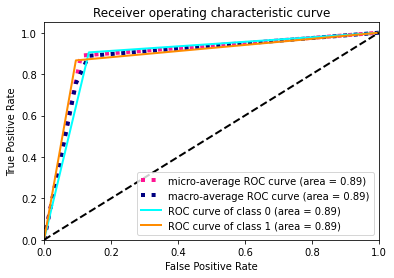

In [23]:
import sklearn.metrics as metrics
from sklearn.metrics import classification_report
predictions_test_cnn = model.predict(padded_docs_test)
predictions_testcnn1 = np.zeros_like(predictions_test_cnn)
predictions_testcnn1[np.arange(len(predictions_test_cnn)), predictions_test_cnn.argmax(1)] = 1
from sklearn.metrics import classification_report
print(classification_report(label_test, predictions_testcnn1))
print(metrics.classification_report(label_test, predictions_testcnn1, target_names = classes_list ))

from sklearn.metrics import accuracy_score
print("Accuracy score =", accuracy_score(label_test,predictions_testcnn1))

from sklearn.metrics import roc_auc_score
print("ROC_AUC score =", roc_auc_score(label_test,predictions_test_cnn))

plt.clf()
cnf_matrix = metrics.confusion_matrix(label_test.argmax(axis =1), predictions_testcnn1.argmax(axis = 1))
print(cnf_matrix)
plot_confusion_matrix(cnf_matrix, classes = classes_list, normalize = True)
plt.savefig("/content/drive/MyDrive/shashank_paper_1/confusion_cnn.pdf", format = 'pdf', dpi =1000)
plt.clf()
plot_AUC_ROC(label_test, predictions_testcnn1)
plt.savefig("/content/drive/MyDrive/shashank_paper_1/ROC_AUC_cnn.pdf", format = 'pdf', dpi =1000)

In [24]:
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Input, RepeatVector
from keras.layers import Embedding, LSTM, Bidirectional, SimpleRNN, GRU
from keras.models import Sequential, Model
from keras.layers.core import Permute
from keras import layers
from keras import backend as K
from keras.layers import Dense,Input,Dropout, concatenate,Concatenate
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Input
from keras.layers import Embedding, LSTM, Bidirectional, SimpleRNN, GRU
from keras.models import Sequential, Model
import keras


In [25]:
units = 64
lstm_input= Input(shape=(embedding_vecor_length,),  dtype='int32', name='lstm_input')
x= Embedding(vocab_size+1, 200,weights=[embedding_matrix], input_length=embedding_vecor_length,trainable=False)(lstm_input)
x1=LSTM(256,return_sequences=True, dropout = 0.2, recurrent_dropout = 0.2)(x)
lstm_out= LSTM(64,return_sequences=True, dropout = 0.2, recurrent_dropout = 0.2)(x1)
attention = Dense(1, activation = 'tanh')(lstm_out)
attention = Flatten()(attention)
attention1 = Activation('softmax')(attention)
attention = RepeatVector(units)(attention1)
attention = Permute([2,1])(attention)

sent_representation = layers.Multiply()([lstm_out, attention])
sent_representation = layers.Lambda(lambda xin: K.sum(xin, axis = -2), output_shape = (units,))(sent_representation)
'''
input2 = Input(shape=(X_train_tfidf.shape[1],))
dense1 = Dense(512,  activation='relu')(input2)
dense2 = Dense(16, activation='relu')(dense1)
merged  = keras.layers.concatenate([sent_representation, dense2])
'''
main_output = Dense(2,activation='softmax', name='main_output')(sent_representation)
model_lstm = Model(inputs=lstm_input, outputs=main_output)

model_lstm.compile(loss='binary_crossentropy', optimizer='Adam', metrics=['accuracy'])
print(model_lstm.summary())

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 lstm_input (InputLayer)        [(None, 32)]         0           []                               
                                                                                                  
 embedding_1 (Embedding)        (None, 32, 200)      2355000     ['lstm_input[0][0]']             
                                                                                                  
 lstm (LSTM)                    (None, 32, 256)      467968      ['embedding_1[0][0]']            
                                                                                                  
 lstm_1 (LSTM)                  (None, 32, 64)       82176       ['lstm[0][0]']                   
                                                                                              

In [26]:
model_lstm.fit(padded_docs_train, label_train, validation_data = (padded_docs_test, label_test),
          epochs=2,batch_size=100, verbose=2)

Epoch 1/2
91/91 - 42s - loss: 0.4242 - accuracy: 0.7961 - val_loss: 0.3148 - val_accuracy: 0.8654 - 42s/epoch - 460ms/step
Epoch 2/2
91/91 - 35s - loss: 0.3091 - accuracy: 0.8610 - val_loss: 0.2862 - val_accuracy: 0.8720 - 35s/epoch - 386ms/step


              precision    recall  f1-score   support

           0       0.95      0.83      0.89      1811
           1       0.78      0.94      0.85      1197

   micro avg       0.87      0.87      0.87      3008
   macro avg       0.87      0.88      0.87      3008
weighted avg       0.89      0.87      0.87      3008
 samples avg       0.87      0.87      0.87      3008

                precision    recall  f1-score   support

Non-depressive       0.95      0.83      0.89      1811
    Depressive       0.78      0.94      0.85      1197

     micro avg       0.87      0.87      0.87      3008
     macro avg       0.87      0.88      0.87      3008
  weighted avg       0.89      0.87      0.87      3008
   samples avg       0.87      0.87      0.87      3008

Accuracy score = 0.8720079787234043
ROC_AUC score = 0.953567772735723
[[1502  309]
 [  76 1121]]
Normalized confusion matrix
[[0.82937604 0.17062396]
 [0.06349206 0.93650794]]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:36: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead


<Figure size 432x288 with 0 Axes>

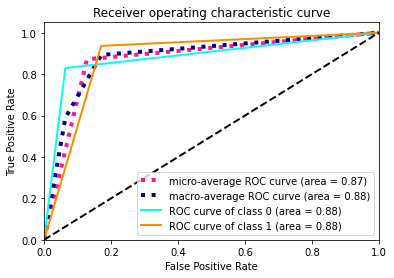

In [36]:
import sklearn.metrics as metrics
from sklearn.metrics import classification_report
predictions_test_cnn = model_lstm.predict(padded_docs_test)
predictions_testcnn2 = np.zeros_like(predictions_test_cnn)
predictions_testcnn2[np.arange(len(predictions_test_cnn)), predictions_test_cnn.argmax(1)] = 1
from sklearn.metrics import classification_report
print(classification_report(label_test, predictions_testcnn1))
print(metrics.classification_report(label_test, predictions_testcnn2, target_names = classes_list ))

from sklearn.metrics import accuracy_score
print("Accuracy score =", accuracy_score(label_test,predictions_testcnn2))

from sklearn.metrics import roc_auc_score
print("ROC_AUC score =", roc_auc_score(label_test,predictions_test_cnn))

plt.clf()
cnf_matrix = metrics.confusion_matrix(label_test.argmax(axis =1), predictions_testcnn2.argmax(axis = 1))
print(cnf_matrix)
plot_confusion_matrix(cnf_matrix, classes = classes_list, normalize = True)
plt.savefig("/content/drive/MyDrive/shashank_paper_1/confusion_lstm.pdf", format = 'pdf', dpi =1000)
plt.clf()
plot_AUC_ROC(label_test, predictions_testcnn2)
plt.savefig("/content/drive/MyDrive/shashank_paper_1/ROC_AUC_lstm.pdf", format = 'pdf', dpi =1000)

In [37]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vector = TfidfVectorizer()
X_train_tfidf = tfidf_vector.fit_transform(train)
X_test_tfidf = tfidf_vector.transform(test)

In [38]:
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.svm import SVC
model_SVM = SVC(probability=True)
model_SVM.fit(X_train_tfidf,  np.asarray(labels_train))

SVC(probability=True)

              precision    recall  f1-score   support

           0       0.90      0.92      0.91      1811
           1       0.87      0.85      0.86      1197

    accuracy                           0.89      3008
   macro avg       0.89      0.89      0.89      3008
weighted avg       0.89      0.89      0.89      3008

                precision    recall  f1-score   support

Non-depressive       0.90      0.92      0.91      1811
    Depressive       0.87      0.85      0.86      1197

      accuracy                           0.89      3008
     macro avg       0.89      0.89      0.89      3008
  weighted avg       0.89      0.89      0.89      3008

Accuracy score = 0.8922872340425532
ROC_AUC score = 0.885338230538614
[[1665  146]
 [ 178 1019]]
Normalized confusion matrix
[[0.91938156 0.08061844]
 [0.1487051  0.8512949 ]]


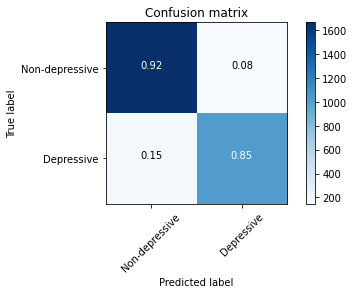

In [39]:
import sklearn.metrics as metrics
from sklearn.metrics import classification_report
predictions_test_cnn = model_SVM.predict(X_test_tfidf )

from sklearn.metrics import classification_report
print(classification_report(labels_test, predictions_test_cnn))
print(metrics.classification_report(labels_test, predictions_test_cnn, target_names = classes_list ))

from sklearn.metrics import accuracy_score
print("Accuracy score =", accuracy_score(labels_test,predictions_test_cnn))

from sklearn.metrics import roc_auc_score
print("ROC_AUC score =", roc_auc_score(labels_test,predictions_test_cnn))

plt.clf()
cnf_matrix = metrics.confusion_matrix(labels_test, predictions_test_cnn)
print(cnf_matrix)
plot_confusion_matrix(cnf_matrix, classes = classes_list, normalize = True)
plt.savefig("/content/drive/MyDrive/shashank_paper_1/confusion_svm.pdf", format = 'pdf', dpi =1000)
#plot_AUC_ROC(labels_test, predictions_test_cnn)
#plt.savefig("/content/drive/MyDrive/shashank_paper_1/ROC_AUC_svm.pdf", format = 'pdf', dpi =1000)

In [40]:
predict_svm = model_SVM.predict(X_test_tfidf)

In [41]:
y_predicted_final = []
for i in range (0, len(predict_svm)):
  if predictions_testcnn1.argmax(1)[i] + predictions_testcnn2.argmax(1)[i] + predict_svm[i] >= 2:
    y_predicted_final.append(1)
  else:
    y_predicted_final.append(0)


In [42]:
y_predicted_final_array = np.asarray(y_predicted_final)

In [51]:
import sklearn.metrics as metrics
from sklearn.metrics import classification_report
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
print("Accuracy score =", accuracy_score(labels_test,y_predicted_final_array))
from sklearn.metrics import roc_auc_score
#print("ROC_AUC score =", roc_auc_score(label_test,predictions_test_cnn))

plt.clf()
cnf_matrix = metrics.confusion_matrix(labels_test, y_predicted_final_array)
print(cnf_matrix)
plot_confusion_matrix(cnf_matrix, classes = classes_list, normalize = True)
plt.savefig("/content/drive/MyDrive/shashank_paper_1/ECLS_confusion.pdf", format = 'pdf', dpi =1000)
plt.clf()
#plot_AUC_ROC(label_test, predictions_testcnn1)
#plt.savefig("/content/drive/MyDrive/shashank_paper_1/ROC_AU.pdf", format = 'pdf', dpi =1000)

Accuracy score = 0.8720079787234043
[[1502  309]
 [  76 1121]]
Normalized confusion matrix
[[0.82937604 0.17062396]
 [0.06349206 0.93650794]]


<Figure size 432x288 with 0 Axes>